# Unstructured Data Analytics HW1

Name: Ravikumar Patel

Andrew ID: rjpatel

Collaborators (if none, say "none"; do *not* leave this blank): Kumar Ashwarya, Manmitha Patya Gulipilli 

Reminder: you should not be sharing code.

**Warning: make sure your compute environment is set up first.** This homework assignment assumes that you have already installed Anaconda Python 3 and spaCy. Instructions for installing these are part of the tutorial [here](https://www.andrew.cmu.edu/user/georgech/95-865/Anaconda,%20Jupyter,%20and%20spaCy%20setup%20tutorial.pdf).

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes.)
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).

### [Problem 1] Basic Text Analysis [45 pts]

This problem involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). Roughly speaking, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, you are going to check whether Zipf's law holds for a real dataset of text documents.

The dataset we look at is a collection of the 100 most popular books downloaded from the [Gutenburg Project](https://www.gutenberg.org/browse/scores/top). These 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.

Note: Please *do not* change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will not receive points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

```python
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
```

**(a) Warm-up/basic Python review [15 pts across subparts].** This part serves as a warm-up, getting you familiar with the kind of code we will be writing in this class. Note that throughout part (a), your code should **not** be using spaCy.

**Subpart i [5 pts].** Write a loop that iterates through all 100 books; for each book, print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`; this is just counting the number of characters).

**Please do not actually print out the contents of each book since many of the books are extremely long, and by printing out all the books' contents, you'll end up creating a Jupyter notebook that has a massive file size.**

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

Your output should look like (although there should be 100 books rather than 3 as shown below; also, the ordering of the books might be different on your machine):

```
./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
```

In [1]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)


In [2]:
########################################################################
######################### Write your code here #########################
########################################################################

import glob
all_books_names = glob.glob('./HW1_Dataset/*.txt')

for book in all_books_names:
    text = open(book, mode = "r", encoding = "utf8").read()
    str_len = len(text)
    print(book, str_len)

./HW1_Dataset\A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (265).txt 177758
./HW1_Dataset\A History of Spanish Literature by James Fitzmaurice-Kelly (109).txt 765918
./HW1_Dataset\A Modest Proposal by Jonathan Swift (233).txt 38966
./HW1_Dataset\A Study in Scarlet by Arthur Conan Doyle (163).txt 262340
./HW1_Dataset\A Tale of Two Cities by Charles Dickens (425).txt 776702
./HW1_Dataset\Adventures of Huckleberry Finn by Mark Twain (401).txt 593962
./HW1_Dataset\Alice in Wonderland by Lewis Carroll and Alice Gerstenberg (126).txt 104079
./HW1_Dataset\Alice's Adventures in Wonderland by Lewis Carroll (564).txt 163817
./HW1_Dataset\Anne of Green Gables by L. M.  Montgomery (114).txt 580635
./HW1_Dataset\Autobiography of Benjamin Franklin by Benjamin Franklin (247).txt 458600
./HW1_Dataset\Beowulf An Anglo-Saxon Epic Poem (403).txt 292953
./HW1_Dataset\Beyond Good and Evil by Friedrich Wilhelm Nietzsche (120).txt 402273
./HW1_Dataset\Candide by Voltaire (1

**Subpart ii [5 pts].** Copy and paste your code from **subpart i** into the code cell below. Then in the code cell below, modify the code so that it prints out the top 15 longest books (in terms of raw string length, which is what you had already computed). In particular, please write your code so that the printout is of the following format:

```
1. <number of characters in longest text file> <filename of longest text file>
2. <number of characters in 2nd longest text file> <filename of 2nd longest text file>
...
15. <number of characters in 15th longest text file> <filename of 15th longest text file>
```

Note: only print out information for the top 15 books in the format above; please do not repeat printing what we asked you to print in **subpart i**.

In [3]:
########################################################################
######################### Write your code here #########################
########################################################################

#all_books_names = glob.glob('./HW1_Dataset/*.txt')

# reference: https://docs.python.org/3/howto/sorting.html and https://docs.python.org/3/library/stdtypes.html#list.sort

books_list = list()

for book in all_books_names:
    text = open(book, mode = "r", encoding = "utf8").read()
    str_len = len(text)
    books_list.append((str_len, book))
    
books_list.sort(key = lambda x: x[0], reverse = True)

for i in range(len(books_list)):
    if i < 15:
        print(books_list[i][0], books_list[i][1])

5465100 ./HW1_Dataset\The Complete Works of William Shakespeare by William Shakespeare (132).txt
4351846 ./HW1_Dataset\The King James Version of the Bible (132).txt
3254333 ./HW1_Dataset\Les Misérables by Victor Hugo (165) (Unicode Encoding Conflict).txt
3227580 ./HW1_Dataset\War and Peace by graf Leo Tolstoy (251).txt
3033575 ./HW1_Dataset\Essays of Michel de Montaigne — Complete by Michel de Montaigne (205).txt
2643849 ./HW1_Dataset\The Count of Monte Cristo, Illustrated by Alexandre Dumas (160).txt
1534140 ./HW1_Dataset\Ulysses by James Joyce (282).txt
1378627 ./HW1_Dataset\My Secret Life, Volumes I. to III. by Anonymous (157).txt
1238569 ./HW1_Dataset\Moby Dick; Or, The Whale by Herman Melville (413).txt
1231784 ./HW1_Dataset\Leviathan by Thomas Hobbes (417).txt
1214387 ./HW1_Dataset\The Republic by Plato (246).txt
1200021 ./HW1_Dataset\The History of the Peloponnesian War by Thucydides (122).txt
1175588 ./HW1_Dataset\The Iliad by Homer (256).txt
1167141 ./HW1_Dataset\The Federalis

**Subpart iii [5 pts].** You should find that some of the books are quite long. Processing very long books will be problematic with spaCy, so we will want to chop up long books into pieces. Note that later on in the course, we shall see that chopping up large amounts of data into small pieces or "batches" is in fact quite common in machine learning since for massive datasets, we often cannot store them in their entirety on a CPU or GPU for processing all at once.

As a toy example, suppose that a book's text is `'cat dog shark spam eggs'` and we want to split it up into batches where each batch has at most 3 words. Then we could split up the book's text into two batches/pieces: `'cat dog shark'` and `'spam eggs'`.

We have provided code for you to do this below.

In [4]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))

['cat dog shark', 'spam eggs']


Now write a loop that goes through all 100 books again. However, for each book, split it up into batches so that each batch has at most 10000 words. In this case, how many batches are there total across all 100 books? Please write code that computes this number of batches. Your code should print out the following (with the correct total number of batches):

```
Total number of batches: <total number of batches across all 100 books>
```

In [5]:
########################################################################
######################### Write your code here #########################
########################################################################

cumulative_counter = 0

for book in all_books_names:
    text = open(book, mode = "r", encoding = "utf8").read()
    list_batches = split_into_batches(text, 10000)
    batches_count = len(list_batches)
    cumulative_counter += batches_count

print(f"Total number of batches: {cumulative_counter}")

Total number of batches: 1246


**(b) [10 pts]** Now we will finally use spaCy. Note that for this problem, you don't actually need `spaCy`'s named entity recognition or grammatical parsing. Turning these elements off when you instantiate the `nlp` object can substantially speed up your code. To make sure these are off when instantiating the `nlp` object, call: 

```python
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
```

**Throughout this problem, do not remove stopwords.**

Build a term frequency (raw counts) table that is for all 100 books. Specifically, building on your solution to part (a)-subpart iii, read in a single book at a time and for each book, do the following:

  1. Split it up into batches where each batch has at most 10000 words.
  2. For each batch:
    1. Process the batch by separating and lemmatizing the words
    2. Count the number of times each lemma appears and add these to the frequency table. For simplicity, **do not convert lemmas to lowercase**. (Note that we use raw counts as the "frequency"--do not do any division.) Also, as we explain below, we will only count lemmas that are alphanumeric.

Note that just as we had said in part (a): do **not** print out the complete contents of every book since doing so will result in a Jupyter notebook file that is massive.

After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the lemmas, only include lemmas that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

```python
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
```

In [6]:
########################################################################
######################### Write your code here #########################
########################################################################

# reference: https://gist.github.com/georgehc/932764d81cd246a60b85e28648cf05bc 
#(94-775/95-865: Basic Text Processing with spaCy)      

import spacy
import re


nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])


from collections import Counter

lemma_count = Counter()


for book in all_books_names:
    text = open(book, mode = "r", encoding = "utf8").read()
    list_batches = split_into_batches(text, 10000)
    #batches_count = len(list_batches)
    #cumulative_counter += batches_count

    for batch in list_batches:
        parsed_text = nlp(batch)
        for token in parsed_text:
            lemma = token.lemma_
            if re.match('[a-zA-Z]+$', lemma):
                lemma_count[lemma] += 1
                
                
lemma_count_sorted = lemma_count.most_common()

top_50_lemma = [lemma for lemma, count in lemma_count_sorted[:50]]

for i in range(50):
    lemma, count = lemma_count_sorted[i]
    print(f"Word: {lemma} \tFrequency: {count} \tRank: {i+1}")


Word: the 	Frequency: 702301 	Rank: 1
Word: be 	Frequency: 436045 	Rank: 2
Word: and 	Frequency: 435432 	Rank: 3
Word: of 	Frequency: 386343 	Rank: 4
Word: to 	Frequency: 324345 	Rank: 5
Word: I 	Frequency: 254952 	Rank: 6
Word: a 	Frequency: 232719 	Rank: 7
Word: in 	Frequency: 204234 	Rank: 8
Word: he 	Frequency: 193507 	Rank: 9
Word: that 	Frequency: 158935 	Rank: 10
Word: have 	Frequency: 158148 	Rank: 11
Word: it 	Frequency: 135414 	Rank: 12
Word: not 	Frequency: 112312 	Rank: 13
Word: his 	Frequency: 108537 	Rank: 14
Word: you 	Frequency: 105094 	Rank: 15
Word: with 	Frequency: 101226 	Rank: 16
Word: they 	Frequency: 96202 	Rank: 17
Word: for 	Frequency: 95261 	Rank: 18
Word: as 	Frequency: 90714 	Rank: 19
Word: she 	Frequency: 78940 	Rank: 20
Word: but 	Frequency: 75598 	Rank: 21
Word: my 	Frequency: 74019 	Rank: 22
Word: do 	Frequency: 68716 	Rank: 23
Word: at 	Frequency: 64947 	Rank: 24
Word: on 	Frequency: 62798 	Rank: 25
Word: this 	Frequency: 61222 	Rank: 26
Word: by 	Frequ

In [7]:
count_sorted = list()
lemma_sorted = list()
ranks = list()

for i in range(len(lemma_count_sorted)):
    ranks.append(i+1)


for lemma, count in lemma_count_sorted:
    count_sorted.append(count)


**(c) [10 pts]** Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

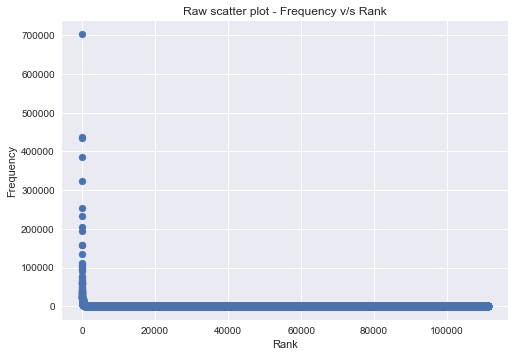

In [8]:
# Raw scatter plot
########################################################################
######################### Write your code here #########################
########################################################################

x = ranks
y = count_sorted

plt.scatter(x, y)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Raw scatter plot - Frequency v/s Rank')
plt.show()


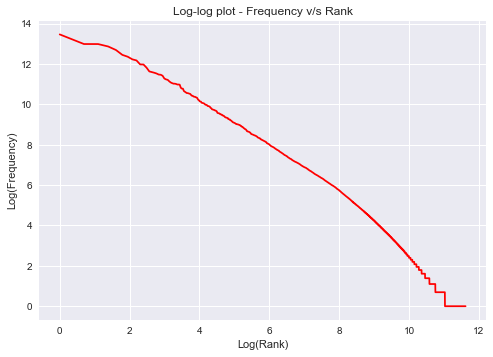

In [9]:
# Log-log plot
########################################################################
######################### Write your code here #########################
########################################################################

#https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.loglog.html
#Reference: https://riptutorial.com/matplotlib/example/31103/loglog-graphing

xlog = np.log(x)
ylog = np.log(y)

plt.plot(xlog, ylog, color = 'red')
plt.xlabel('Log(Rank)')
plt.ylabel('Log(Frequency)')
plt.title('Log-log plot - Frequency v/s Rank')
#plt.grid()
plt.show()


**(d) [10 pts across subparts]** Let's now try to make sense of the very last plot in part **(c)**. Zipf's law states that term frequency is governed by a power law, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant that is approximately 0.1*(corpus size) for English.

Please answer the following questions:

**Subpart i [3 pts].** What do you observe in the log-log plot above? Is this consist with the power law?


Your text answer (for this question, your answer is *not* code): 

The loglog plot above is almost linear with the slope close to -1, Log(Frequency) here is linearly proportional to Log(Rank) with slope close to -1. 

If the plot above is governed by a power law, the equation in log terms would be Log(Frequency) = Log(c) + (-1) * Log(Rank) and the slope of the plot between Log(Frequency) and Log(Rank) should be -1 which is almost the same in the plot. Hence, the plot is consistant with power law.

**Subpart ii [4 pts].** Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words; thus what remains in the bag are actually alphanumeric lemmas). What is the probability of drawing one of the 4 most frequent alphanumeric lemmas? What is the probability of drawing one of the 50 most frequent alphanumeric lemmas? Answer these two questions using code rather than just entering in the final answers as numbers.

In [10]:
count_4 = 0
count_50 = 0

total_count = sum(count_sorted)

ranks
count_sorted
lemma_sorted

for i in range(len(count_sorted)):
    if ranks[i] <= 4:
        count_4 += count_sorted[i]
        
    if ranks[i] <= 50:
        count_50 += count_sorted[i]

prob_4 = count_4 / total_count
prob_50 = count_50 / total_count

print(f'Probability of drawing one of the 4 most frequent alphanumeric lemmas: {prob_4}')
########################################################################
######################### Write your code here #########################
########################################################################

print(f'Probability of drawing one of the 50 most frequent alphanumeric lemmas: {prob_50}')
########################################################################
######################### Write your code here #########################
########################################################################

Probability of drawing one of the 4 most frequent alphanumeric lemmas: 0.16227588475878102
Probability of drawing one of the 50 most frequent alphanumeric lemmas: 0.4829554608342353


**Subpart iii [4 pts].** What proportion of the alphanumeric lemmas occur only once? What proportion of the alphanumeric lemmas occur fewer than 10 times?

In [11]:
lemma_count_1 = 0
lemma_count_9 = 0


for i in range(len(count_sorted)):
    if count_sorted[i] == 1:
        lemma_count_1 += 1
        
    if count_sorted[i] < 10:
        lemma_count_9 += 1

prop_1 = lemma_count_1 / len(count_sorted)
prop_9 = lemma_count_9 / len(count_sorted)



print(f"Occur only once: {prop_1}")
########################################################################
######################### Write your code here #########################
########################################################################

print(f"Occur fewer than 10 times: {prop_9}")
########################################################################
######################### Write your code here #########################
########################################################################

Occur only once: 0.4472280922620386
Occur fewer than 10 times: 0.782428847623758


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

```python
import nltk
nltk.download('reuters')
```

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing. Hence, you will want to instantiate the nlp object by calling:

```python
nlp = spacy.load('en_core_web_sm', disable=['parser'])
```


**(a) [15 pts]** Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

C:\Users\Ravi\AppData\Roaming\Python\Python39\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Text(0, 0.5, 'Frequency')

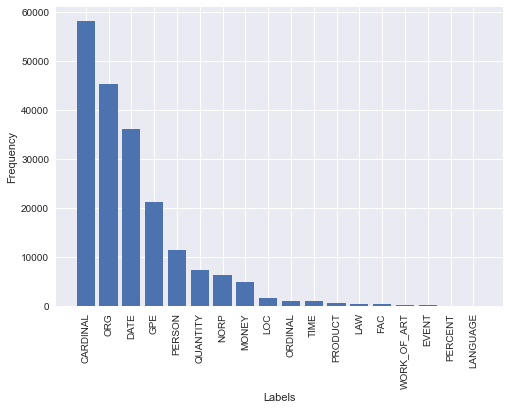

In [12]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()

########################################################################
######################### Write your code here #########################
########################################################################

#reference: https://gist.github.com/georgehc/932764d81cd246a60b85e28648cf05bc


# reuters_nlp is a list of nlp's

for parsed_text in reuters_nlp:

    for entity in parsed_text.ents:
        label = entity.label_
        #labels.append(label)
        label_counter[label] += 1

label_counter_sorted = label_counter.most_common()

labels = [label for label, count in label_counter_sorted]
counts = [count for label, count in label_counter_sorted]

plt.bar(range(len(labels)), counts)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.xlabel('Labels')
plt.ylabel('Frequency')



**(b) [15 pts]** Now list the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization). Separately list the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectively. **In both cases, please convert the entity names to lowercase first before computing the top 10.**

Here, when counting the (raw count) frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.

In [13]:
########################################################################
######################### Write your code here #########################
########################################################################

entity_counter_org = Counter()
entity_counter_gpe = Counter()

for parsed_text in reuters_nlp:
    repeat_check_org = list()
    repeat_check_gpe = list()
    
    for entity in parsed_text.ents:
        entity_lower = str(entity).lower()
        label = entity.label_
        if label == "ORG":
            if entity_lower not in repeat_check_org:
                entity_counter_org[entity_lower] += 1
                repeat_check_org.append(entity_lower)

        if label == "GPE":
            if entity_lower not in repeat_check_gpe:
                entity_counter_gpe[entity_lower] += 1
                repeat_check_gpe.append(entity_lower)
                
    


entity_counter_org_sorted = entity_counter_org.most_common()

entity_counter_gpe_sorted = entity_counter_gpe.most_common()

print("List the top 10 most frequently occurring entities with label ORG (Entity text, Number of occurence):")
for i in range(10):
    print(f"{entity_counter_org_sorted[i][0]}, {entity_counter_org_sorted[i][1]}")

    
print("\n\nList the top 10 most frequently occurring entities with label GPE (Entity text, Number of occurence):")
for i in range(10):
    print(f"{entity_counter_gpe_sorted[i][0]}, {entity_counter_gpe_sorted[i][1]}")


List the top 10 most frequently occurring entities with label ORG (Entity text, Number of occurence):
reuters, 447
the securities and exchange commission, 249
ec, 237
treasury, 222
fed, 209
usda, 181
the u.s. agriculture department, 168
the bank of england, 142
congress, 136
opec, 125


List the top 10 most frequently occurring entities with label GPE (Entity text, Number of occurence):
u.s., 1674
japan, 575
the united states, 381
u.k., 305
canada, 304
new york, 256
west germany, 237
washington, 233
london, 211
brazil, 195


**(c) [20 pts]** Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? **Just like in the previous part, please convert entity names to lowercase in your analysis.**

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [14]:
########################################################################
######################### Write your code here #########################
########################################################################


#count of docs with opec

opec_count = 0

for parsed_text in reuters_nlp:

    for entity in parsed_text.ents:
        label = entity.label_
        entity_lower = str(entity).lower()
        #labels.append(label)
        if label == "ORG" and entity_lower == "opec":
            opec_count += 1
            break

entity_counter_gpe_opec = Counter()
entity_counter_gpe = Counter()
entity_lower_list = list()



for parsed_text in reuters_nlp:
    
    opec_check = 0
    repeat_check_gpe = list()

    for entity in parsed_text.ents:
        label = entity.label_
        entity_lower = str(entity).lower()
        if label == "ORG" and entity_lower == "opec":
            opec_check = 1

    for entity in parsed_text.ents:
        label = entity.label_
        entity_lower = str(entity).lower()

        if label == "GPE":
            if entity_lower not in repeat_check_gpe:
                entity_counter_gpe[entity_lower] += 1
                
                if opec_check == 1:
                    entity_counter_gpe_opec[entity_lower] += 1

                repeat_check_gpe.append(entity_lower)
                entity_lower_list.append(entity_lower)
                

entity_counter_gpe_sorted = entity_counter_gpe.most_common()
entity_counter_gpe_opec_sorted = entity_counter_gpe_opec.most_common()


#entity_counter_gpe_list = [(i,j) for i,j in entity_counter_gpe_sorted]

entity_lower_unique = set(entity_lower_list)

dict_gpe_count = dict()
dict_gpe_opec_count = dict()



for i,j in entity_counter_gpe_sorted:
    dict_gpe_count[i] = j

for i,j in entity_counter_gpe_opec_sorted:
    dict_gpe_opec_count[i] = j
                   

gpe_ratio = list()

list_gpe_opec_count = list(dict_gpe_opec_count.keys())

#print(list_gpe_opec_count)

for entity_lower in entity_lower_unique:
    if entity_lower in list_gpe_opec_count:
        gpe_ratio.append((entity_lower, dict_gpe_opec_count[entity_lower] / dict_gpe_count[entity_lower]))

#print(gpe_ratio)

sorted_gpe_ratio = sorted(gpe_ratio, key = lambda pair: pair[1], reverse = True)

#print(sorted_gpe_ratio)

for i in range(50):
    print(f"GPE: {sorted_gpe_ratio[i][0]} \tPMI: {sorted_gpe_ratio[i][1]}".expandtabs(35))


GPE: tripoli                       PMI: 1.0
GPE: petromin                      PMI: 1.0
GPE: napo province                 PMI: 1.0
GPE: neutral zone                  PMI: 1.0
GPE: hartley                       PMI: 1.0
GPE: guayaquil                     PMI: 1.0
GPE: rosenberg                     PMI: 1.0
GPE: turben                        PMI: 1.0
GPE: the lake charles              PMI: 1.0
GPE: saudi arabia's king           PMI: 1.0
GPE: materialy                     PMI: 1.0
GPE: duri                          PMI: 1.0
GPE: jubail                        PMI: 1.0
GPE: suharto                       PMI: 1.0
GPE: september norway's            PMI: 1.0
GPE: napo                          PMI: 1.0
GPE: redoglia                      PMI: 1.0
GPE: lajous                        PMI: 1.0
GPE: el salado                     PMI: 1.0
GPE: east room                     PMI: 1.0
GPE: bethesda                      PMI: 1.0
GPE: opecna                        PMI: 1.0
GPE: doha                       

Your text answer (for this question, your answer is *not* code): *** There are several GPE words which are for a location (country, city, state, etc.) related to in this list that were expected to be there in the top list due to their relation to the list of current and former member countries of OPEC which include:Algeria, Angola, Congo, Ecuador, Equatorial Guinea, Gabon, IR Iran, Iraq, Kuwait, Libya, Nigeria, Qatar, Saudi Arabia, United Arab Emirates, Indonesisa and Venezuela. Some of the expected words include napo province, guayaquil, napo, tripoli, libya, lagos, doha, qatar, jubail, saudi arabia, riyadh, emirates, dubai, the united arab emirates, neutral zone, duri, etc. 

It was a surprise to see some words on this list that are not expected to be labelled as GPE because of not being a location (country, city, state, etc.). E.g. saudi arabia's king, suharto (President of Indonesia), petromin (Saudi Arabian lubricants and automotive services company). These words might have been wrongly assigned a label of GPE. 

Another set of words were surprising because of not being related to OPEC but they have high PMI because of being closely associated to the Oil business. Such as, rosenberg, the lake charles (a refinary in Louisiana), september norway's, venezuela"s, vienna, antwerp, etc.

The PMI is sometimes high despite lower number of co-occurence (the GPE label and entity name OPEC) also due to the denominator (number of occurence of GPE irrespective of presence of entity name OPEC) being a small count. 
***

### [Problem 3] Questionnaire [5 pts]

Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://forms.gle/ojrc5eWcm7gDnN8L7